In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras import Sequential
from glob import glob

In [2]:
#re-size the images into image_size
image_size=[224,224]

train_path="D:\partiise section\cars dataset\Train"
test_path="D:\partiise section\cars dataset\Test"

In [3]:
#pretrained model we are using 

In [4]:
resnet=ResNet50(input_shape=image_size +[3],weights="imagenet",include_top=False)

In [5]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [6]:
for layer in resnet.layers:
    layer.trainable=False
#dont want train my layers re-using my exciting weights

In [7]:
folders=glob("D:\partiise section\cars dataset\Train\*")

In [8]:
folders

['D:\\partiise section\\cars dataset\\Train\\audi',
 'D:\\partiise section\\cars dataset\\Train\\lamborghini',
 'D:\\partiise section\\cars dataset\\Train\\mercedes']

In [9]:
len(folders)

3

In [10]:
#faltten layer is add to resnet output
x=Flatten()(resnet.output)

In [11]:
prediction=Dense(len(folders),activation="softmax")(x)


#creating a model object

model=Model(inputs=resnet.input,outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [13]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [14]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [15]:
train_set=train_datagen.flow_from_directory(train_path,
                                          target_size=(224,224),
                                          class_mode="categorical",
                                          batch_size=32)

test_set=test_datagen.flow_from_directory(test_path,
                                         target_size=(224,224),
                                         class_mode="categorical",
                                         batch_size=32)

Found 77 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [16]:
#fit the model

r=model.fit_generator(train_set, validation_data=test_set,
                      epochs=50,
                      steps_per_epoch=len(train_set),
                      validation_steps=len(test_set))

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_19040\2524763113.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(train_set, validation_data=test_set,


Epoch 1/50


3/3 [==============================] - 37s 11s/step - loss: 5.6222 - accuracy: 0.3766 - val_loss: 8.6413 - val_accuracy: 0.1552
Epoch 2/50
3/3 [==============================] - 28s 10s/step - loss: 6.9938 - accuracy: 0.4416 - val_loss: 8.4509 - val_accuracy: 0.3276
Epoch 3/50
3/3 [==============================] - 29s 11s/step - loss: 4.8168 - accuracy: 0.3896 - val_loss: 4.5551 - val_accuracy: 0.5517
Epoch 4/50
3/3 [==============================] - 28s 10s/step - loss: 5.2701 - accuracy: 0.4545 - val_loss: 4.8693 - val_accuracy: 0.2759
Epoch 5/50
3/3 [==============================] - 29s 10s/step - loss: 3.1323 - accuracy: 0.5455 - val_loss: 1.1632 - val_accuracy: 0.5172
Epoch 6/50
3/3 [==============================] - 27s 12s/step - loss: 2.9915 - accuracy: 0.4156 - val_loss: 3.6575 - val_accuracy: 0.3448
Epoch 7/50
3/3 [==============================] - 28s 10s/step - loss: 2.2407 - accuracy: 0.4416 - val_loss: 1.3722 - val_accuracy: 0.5862
Epoch 8/50
3/3 [=========

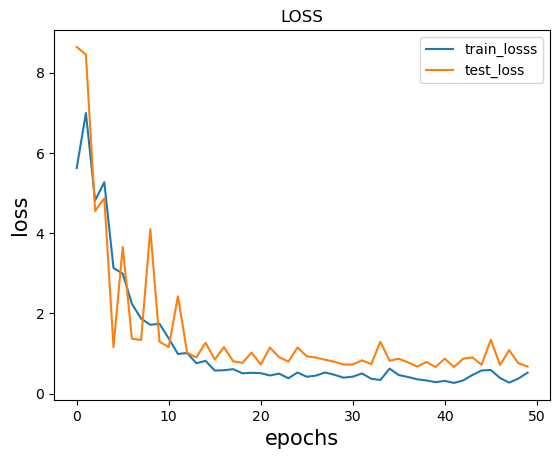

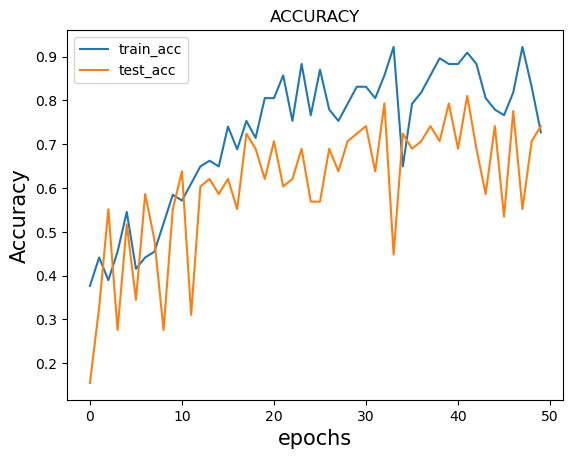

In [17]:
plt.plot(r.history["loss"],label="train_losss")
plt.plot(r.history["val_loss"],label="test_loss")
plt.legend()
plt.xlabel("epochs",size=15)
plt.ylabel("loss",size=15)
plt.title("LOSS")
plt.show()


plt.plot(r.history["accuracy"],label="train_acc")
plt.plot(r.history["val_accuracy"],label="test_acc")
plt.legend()
plt.xlabel("epochs",size=15)
plt.ylabel("Accuracy",size=15)
plt.title("ACCURACY")
plt.show()

In [18]:
p=model.evaluate(test_set,verbose=0)
print(p[1])

0.7413793206214905


In [23]:
cars=train_set.class_indices
class_names= list(cars.keys())

In [29]:
image =r"D:\partiise section\cars dataset\Test\audi\29.jpg"
image = tf.keras.utils.load_img(image,target_size=(224,224))
img_arr = tf.keras.utils.array_to_img(image)
img_b=tf.expand_dims(img_arr,0)

In [30]:
pred = model.predict(img_b)

1/1 [==============================] - 0s 313ms/step


In [31]:
score = tf.nn.softmax(pred)

In [32]:
print('This Image belongs to {} with accuracy of {:0.2f}'.format(class_names[np.argmax(score)],np.max(score)*100))

This Image belongs to audi with accuracy of 54.19


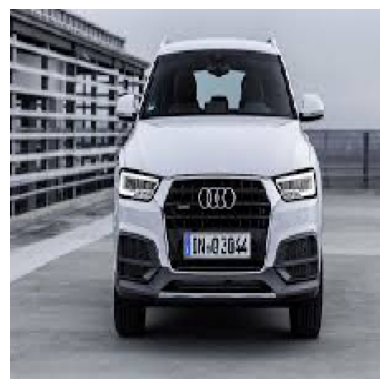

In [33]:
plt.imshow(image)
plt.axis('off')
plt.show()
